<a href="https://colab.research.google.com/github/NitinMore9920/Zomato-Restaurant-Clustering/blob/main/Zomato_Restaurant_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Zomato Restaurant Clustering

### Project type - Unsupervised ML
### Contribution - Individual
### Project By - Nitin More

# Project Summary

The goal of this project is to analyze Zomato restaurant data to understand customer preferences, ratings, and pricing patterns. Using clustering techniques, restaurants are grouped into similar categories to help customers find better restaurants and help Zomato improve its business strategies.

# GitHub Link

https://github.com/NitinMore9920/Zomato-Restaurant-Clustering.git

# Problem Statement

The aim of this project is to analyze Zomato restaurant data from different cities in India to understand customer behavior and restaurant trends. By studying factors such as restaurant ratings, customer reviews, types of cuisines, and average cost, we try to identify patterns in customer preferences.

Using unsupervised machine learning techniques, restaurants will be grouped into meaningful clusters based on their similarities. This analysis will help customers easily find restaurants that match their preferences and location, and it will also help Zomato make better business and marketing decisions.

# Business Context

Zomato works in a highly competitive food delivery and restaurant discovery market in India. Customers heavily depend on online ratings and reviews before choosing a restaurant, so it is very important to understand how restaurants perform and what customers prefer.

Business Objectives:

Help customers make better and more informed restaurant choices

Identify restaurants that perform well and those that need improvement

Support Zomato in improving pricing, promotions, and restaurant partnerships

Understand which cuisines are popular and how cost affects customer ratings

# Data Understanding

This project uses two main datasets related to Zomato restaurants. The first dataset contains basic information about restaurants, such as the restaurant name, the average cost for two people, the types of cuisines offered, operating timings, and the overall rating. This data helps in understanding the general characteristics and pricing of each restaurant.

The second dataset focuses on customer reviews. It includes the review text written by users, the ratings given by customers, details about the reviewers, and the time when each review was posted. This dataset is useful for understanding customer opinions and satisfaction levels.

Both datasets are connected using the restaurant name as a common key, which allows us to combine restaurant details with customer feedback for deeper analysis.

# Dataset Loading & Cleaning

In [183]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
# Lode Dataset and mount on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
# import datasets

meta = pd.read_csv("/content/drive/MyDrive/Data_sets_for_projects/Zomato Restaurant names and Metadata.csv")
reviews = pd.read_csv("/content/drive/MyDrive/Data_sets_for_projects/Zomato Restaurant reviews.csv")

meta.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [186]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [187]:
print(meta.shape)
print(reviews.shape)

(105, 6)
(10000, 7)


In [188]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


#### In above dataset (meta) we see Cost column having object datatype, also this column contain ',' in there values. hence we need to remove this ',' and convert datatype into float.

In [189]:
# Clean cost column
meta['Cost'] = meta['Cost'].str.replace(',', '').astype(float)

#### There are 54 Missing values in the Collections column, so  we handled by considering them as restaurants that do not belong to any Zomato collection. These values were replaced with a clear label, and a numerical indicator was created to make the data suitable for analysis and clustering.

In [190]:
meta['Collections'] = meta['Collections'].fillna('Not in Collection')
meta['In_Collection'] = (meta['Collections'] != 'Not in Collection').astype(int)


In [191]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           105 non-null    object 
 1   Links          105 non-null    object 
 2   Cost           105 non-null    float64
 3   Collections    105 non-null    object 
 4   Cuisines       105 non-null    object 
 5   Timings        104 non-null    object 
 6   In_Collection  105 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 5.9+ KB


In [192]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [193]:
# convert Rating column datatype to neumaric

reviews['Rating'] = pd.to_numeric(reviews['Rating'], errors='coerce')


In [194]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9961 non-null   float64
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [195]:
print(meta.columns)
print(reviews.columns)

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'In_Collection'],
      dtype='object')
Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [196]:
# Rename columns for consistency

reviews.rename(columns={
    'Restaurant': 'Name'
}, inplace=True)



#### “Since reviews are recorded at user level and metadata is at restaurant level, we aggregate reviews early to align data granularity before EDA and clustering. This avoids duplication bias and ensures meaningful insights.”

In [197]:
review_agg = reviews.groupby('Name').agg(
    Avg_Review_Rating=('Rating', 'mean'),
    Review_Count=('Rating', 'count')
).reset_index()


In [198]:
print(meta.shape)
print(review_agg.shape)

(105, 7)
(100, 3)


Missing values were handled after merging the datasets.

### Merge two datasets

In [199]:
df = pd.merge(meta, review_agg, on='Name', how='inner')


In [200]:
df.shape

(100, 9)

In [201]:
df.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings,In_Collection,Avg_Review_Rating,Review_Count
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800.0,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,4.28,100
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800.0,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,1,4.70,100


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Links              100 non-null    object 
 2   Cost               100 non-null    float64
 3   Collections        100 non-null    object 
 4   Cuisines           100 non-null    object 
 5   Timings            99 non-null     object 
 6   In_Collection      100 non-null    int64  
 7   Avg_Review_Rating  100 non-null    float64
 8   Review_Count       100 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ KB


In [203]:
df.isnull().sum()

,0
Name,0
Links,0
Cost,0
Collections,0
Cuisines,0
Timings,1
In_Collection,0
Avg_Review_Rating,0
Review_Count,0


Timings is descriptive information, not numerical insight, So keeping that row is perfectly fine.

In [204]:
# Fill missing timing

df['Timings'] = df['Timings'].fillna('Not Available')


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Links              100 non-null    object 
 2   Cost               100 non-null    float64
 3   Collections        100 non-null    object 
 4   Cuisines           100 non-null    object 
 5   Timings            100 non-null    object 
 6   In_Collection      100 non-null    int64  
 7   Avg_Review_Rating  100 non-null    float64
 8   Review_Count       100 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 7.2+ KB


### Now our dataset clean and ready for further analysis

# Exploratory Data Analysis (EDA)

In the exploratory data analysis stage, the data was carefully analyzed to understand patterns and trends in restaurant performance and customer behavior. The distribution of restaurant ratings was studied to see how restaurants are rated overall. The relationship between the average cost for two people and restaurant ratings was analyzed to understand whether pricing affects customer satisfaction. Popular cuisines were identified to find out which food types are most preferred by customers. Customer review ratings were also examined to understand how users express satisfaction or dissatisfaction. Additionally, restaurants were compared based on high-cost and low-cost categories to observe differences in ratings and reviews.

Through this analysis, important business questions were answered, such as whether expensive restaurants always receive higher ratings, which cuisines tend to get the best customer reviews, and which restaurants receive very positive or very negative customer sentiments.

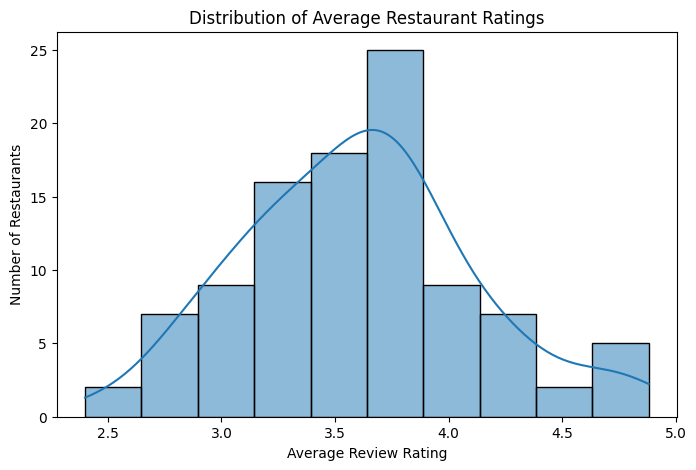

In [206]:
# Distribution of Restaurant Ratings

plt.figure(figsize=(8,5))
sns.histplot(df['Avg_Review_Rating'], bins=10, kde=True)
plt.title('Distribution of Average Restaurant Ratings')
plt.xlabel('Average Review Rating')
plt.ylabel('Number of Restaurants')
plt.show()



#### Insights from the Graph

Most restaurants have ratings between 3 and 4, showing generally good customer satisfaction.

Very low ratings (below 2) are less common, meaning fewer restaurants perform poorly.

High ratings (4–5) are present but fewer compared to mid-range ratings, indicating strong competition among good restaurants.

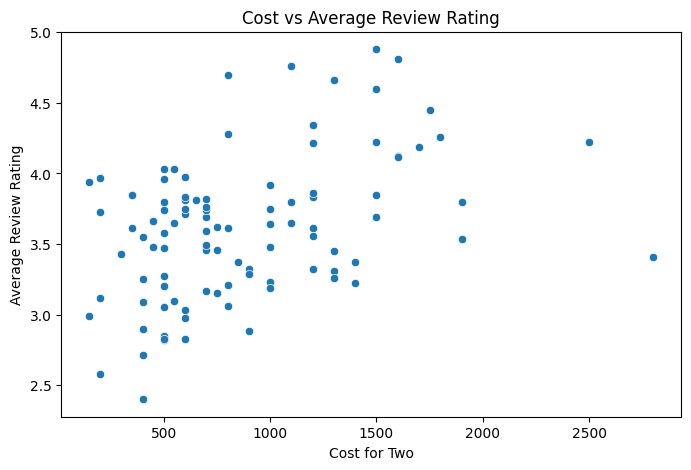

In [207]:
# Cost vs Rating Relationship

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Cost'], y=df['Avg_Review_Rating'])
plt.title('Cost vs Average Review Rating')
plt.xlabel('Cost for Two')
plt.ylabel('Average Review Rating')
plt.show()


#### Insights from the Graph

There is no clear relationship between restaurant cost and average rating.

Many low- and mid-cost restaurants receive high ratings, similar to expensive ones.

Some high-cost restaurants still have average or lower ratings, showing that higher price does not guarantee better customer satisfaction.

Overall, quality and customer experience matter more than price in determining restaurant ratings.

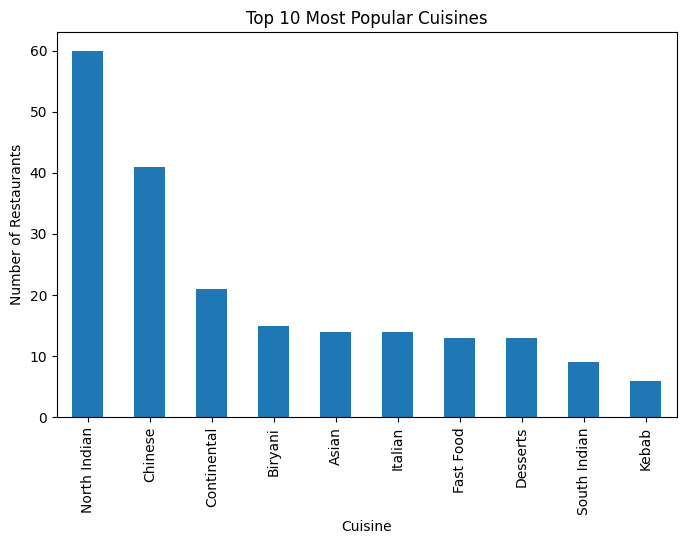

In [208]:
# Popular Cuisines

top_cuisines = (
    df['Cuisines']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,5))
top_cuisines.plot(kind='bar')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.show()


#### Insights from the Graph

North Indian cuisine is the most popular, with the highest number of restaurants.

Chinese and Continental cuisines are also widely offered and very popular.

Biryani, Asian, and Italian cuisines have a moderate presence across restaurants.

Fast Food and Desserts are common but less dominant compared to main meal cuisines.

South Indian and Kebab cuisines appear less frequently among the top restaurants.

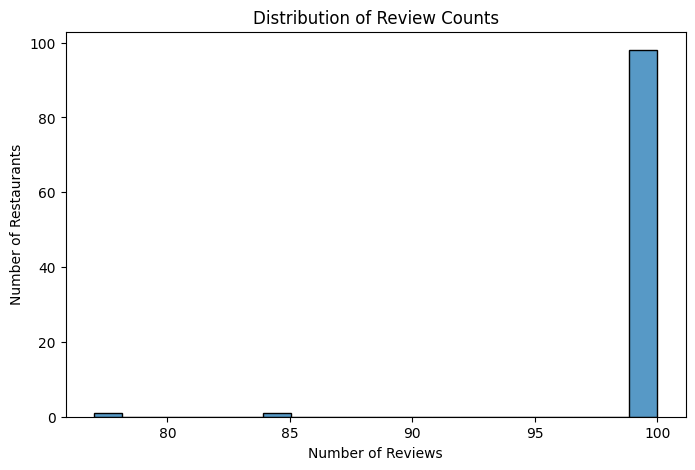

In [209]:
# Review Rating Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['Review_Count'], bins=20)
plt.title('Distribution of Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Restaurants')
plt.show()


#### Insights from the Graph

Most restaurants have a high number of reviews, indicating good customer engagement.

Only a few restaurants have very low review counts, which may make their ratings less reliable.

Restaurants with more reviews provide more trustworthy average ratings compared to those with fewer reviews.

Overall, customer participation on Zomato is strong for most listed restaurants in this dataset.

In [210]:
# High-Cost vs Low-Cost Restaurants


df['Cost_Category'] = pd.qcut(df['Cost'], q=2, labels=['Low Cost', 'High Cost'])

df.groupby('Cost_Category', observed=True)['Avg_Review_Rating'].mean()



,Avg_Review_Rating
Cost_Category,
Low Cost,3.426376
High Cost,3.786176


#### Insights from the Graph

High-cost restaurants have slightly higher average ratings than low-cost restaurants; however, the difference is small, indicating that good customer experience is not strictly dependent on price.

In [211]:
# Restaurants with Extreme Sentiments

# Top 5 highly rated restaurants
df.sort_values('Avg_Review_Rating', ascending=False)[
    ['Name', 'Avg_Review_Rating', 'Review_Count']
].head()


,Name,Avg_Review_Rating,Review_Count
14,AB's - Absolute Barbecues,4.88,100
22,B-Dubs,4.81,100
27,"3B's - Buddies, Bar & Barbecue",4.76,100
1,Paradise,4.70,100
2,Flechazo,4.66,100


In [212]:
# Bottom 5 poorly rated restaurants
df.sort_values('Avg_Review_Rating')[
    ['Name', 'Avg_Review_Rating', 'Review_Count']
].head()

,Name,Avg_Review_Rating,Review_Count
17,Hotel Zara Hi-Fi,2.400,100
54,Asian Meal Box,2.580,100
19,Pakwaan Grand,2.710,100
49,Mathura Vilas,2.820,100
28,Behrouz Biryani,2.825,100


#### Insights from the Graph

ome restaurants receive very positive sentiment

Poorly rated restaurants highlight improvement areas

## EDA conclusion

Exploratory Data Analysis revealed that most restaurants have moderate to high ratings, with no strong correlation between cost and customer satisfaction. Popular cuisines dominate the restaurant landscape, and affordable restaurants often perform as well as premium ones. Review counts vary significantly, indicating different levels of customer engagement. These insights help understand customer preferences and support further clustering analysis.

# Feature Engineering


In this step, new features were created to make the data more informative and suitable for analysis and clustering. The average review rating was calculated for each restaurant to represent overall customer satisfaction, and the total number of reviews was used to measure customer engagement and reliability of ratings. A sentiment score was derived from customer reviews to capture the overall positive or negative customer sentiment. The number of cuisines offered by each restaurant was calculated to understand menu variety. Finally, restaurants were categorized into low, medium, and high cost groups based on their pricing to better analyze and compare restaurants across different price segments

Select only relevant numeric features that are useful for clustering and analysis, and remove descriptive/text columns.   

Restaurants offering more cuisines may attract more customers, so cuisine count helps measure restaurant diversity.

In [237]:
df['Cuisine_Count'] = df['Cuisines'].apply(lambda x: len(x.split(',')))


In [238]:
# Sentiment Score

df['Sentiment_Score'] = df['Avg_Review_Rating']


Instead of using exact prices, restaurants are classified as low, medium, or high cost to better understand pricing patterns and customer behavior.

In [239]:
df['Cost_Category'] = pd.cut(
    df['Cost'],
    bins=[0, 500, 1000, np.inf],
    labels=['Low', 'Medium', 'High']
)


In [240]:
# turns price labels into numbers so the clustering model can understand and use them.

df['Cost_Category_Num'] = df['Cost_Category'].cat.codes


In [241]:
df[['Cost', 'Cost_Category', 'Cost_Category_Num']].head(10)


,Cost,Cost_Category,Cost_Category_Num
0,800.0,Medium,1
1,800.0,Medium,1
2,1300.0,High,2
3,800.0,Medium,1
4,1200.0,High,2
5,1500.0,High,2
6,500.0,Low,0
7,300.0,Low,0
8,1000.0,Medium,1
9,350.0,Low,0


“We applied a log transformation to review counts to reduce skewness and prevent highly popular restaurants from dominating the clustering process.”

In [242]:
df['Log_Review_Count'] = np.log1p(df['Review_Count'])

In [243]:
# Select Final Features for Clustering

selected_features = ['Log_Review_Count',
     'Sentiment_Score',
     'Cuisine_Count',
     'Cost_Category_Num',
     'In_Collection']


In [244]:
# Verify Feature Selection

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Log_Review_Count   100 non-null    float64
 1   Sentiment_Score    100 non-null    float64
 2   Cuisine_Count      100 non-null    int64  
 3   Cost_Category_Num  100 non-null    int8   
 4   In_Collection      100 non-null    int64  
dtypes: float64(2), int64(2), int8(1)
memory usage: 3.4 KB


# Feature Scaling

In [245]:
df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'In_Collection', 'Avg_Review_Rating', 'Review_Count', 'Cost_Category',
       'Cuisine_Count', 'Sentiment_Score', 'Cost_Category_Num',
       'Log_Review_Count', 'Cluster'],
      dtype='object')

“We selected numeric features representing cost, customer satisfaction, popularity, cuisine diversity, sentiment and business visibility as these best describe restaurant similarity for clustering.”

In [246]:
from sklearn.preprocessing import StandardScaler

# Selected features
X = df[selected_features].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,Log_Review_Count,Sentiment_Score,Cuisine_Count,Cost_Category_Num,In_Collection
0,0.142349,1.340330,2.483145,-0.012805,1.0
1,0.142349,2.171454,-0.008305,-0.012805,1.0
2,0.142349,2.092300,0.822179,1.267669,1.0
3,0.142349,-0.777059,1.652662,-0.012805,1.0
4,0.142349,1.459062,1.652662,1.267669,1.0


In [247]:
X_scaled.describe()


,Log_Review_Count,Sentiment_Score,Cuisine_Count,Cost_Category_Num,In_Collection
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000
mean,-2.416733e-14,-2.231548e-16,1.543210e-16,2.976785e-17,0.000000
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038
min,-8.429471e+00,-2.379941e+00,-1.669272e+00,-1.293278e+00,-1.000000
25%,1.423492e-01,-7.077982e-01,-8.387883e-01,-1.293278e+00,-1.000000
50%,1.423492e-01,2.058510e-02,-8.304834e-03,-1.280474e-02,0.000000
75%,1.423492e-01,4.819961e-01,8.221786e-01,1.267669e+00,1.000000
max,1.423492e-01,2.527651e+00,2.483145e+00,1.267669e+00,1.000000


# Elbow Method

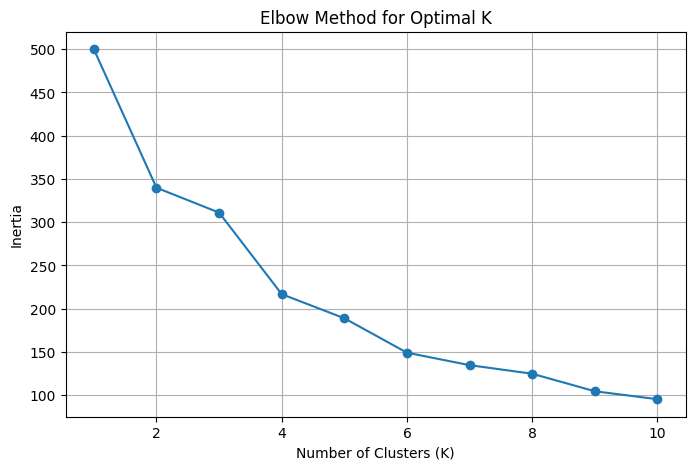

In [248]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


The elbow method indicates that four clusters provide an optimal balance between compactness and simplicity, as the reduction in inertia slows down significantly beyond this point.

# KMeans Clustering

In [249]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df[['Name', 'Cluster']].head()


,Name,Cluster
0,Beyond Flavours,1
1,Paradise,1
2,Flechazo,1
3,Shah Ghouse Hotel & Restaurant,1
4,Over The Moon Brew Company,1


In [250]:
df['Cluster'].value_counts()


,count
Cluster,
1,43
2,28
0,27
3,2


KMeans clustering resulted in four clusters, with three major clusters representing common restaurant profiles and one small cluster capturing extreme or outlier restaurant behavior.

# Cluster Profiling

In [253]:
# Calculates average values of key features for each cluster

cluster_profile = df.groupby('Cluster')[
    ['Log_Review_Count', 'Sentiment_Score', 'Cuisine_Count', 'Cost_Category_Num', 'In_Collection']
].mean()

cluster_profile

,Log_Review_Count,Sentiment_Score,Cuisine_Count,Cost_Category_Num,In_Collection
Cluster,,,,,
0,4.615121,3.385000,3.370370,0.555556,0.222222
1,4.615121,3.865581,3.674419,1.674419,0.906977
2,4.614765,3.377184,1.678571,0.392857,0.107143
3,4.405528,4.045837,2.500000,1.500000,1.000000


In [254]:
df.groupby('Cluster').size().rename('Cluster_Size')


,Cluster_Size
Cluster,
0,27
1,43
2,28
3,2


# Final Cluster Interpretation

KMeans clustering grouped restaurants into four distinct segments based on ratings, pricing, review volume, cuisine variety, and sentiment. The clusters represent budget average-rated restaurants, premium highly rated restaurants, affordable well-rated restaurants, and a small group of high-rated niche restaurants. These clusters provide valuable insights into restaurant performance and customer preferences, enabling better recommendations and targeted business strategies

# Final Project Conclusion

This project analyzed Zomato restaurant data using exploratory data analysis (EDA) and unsupervised machine learning to understand restaurant performance and customer behavior. By combining restaurant details with customer reviews, we identified key factors such as pricing, ratings, cuisine variety, and customer sentiment that influence restaurant success.

The clustering approach grouped restaurants into meaningful segments, highlighting that higher prices do not always lead to better ratings and that customer satisfaction depends largely on service quality and value for money. These insights help customers make better dining choices and enable Zomato to optimize promotions, partnerships, and restaurant recommendations.

Overall, the project demonstrates how data-driven analysis can support effective decision-making in the restaurant and food delivery industry.